OVERVIEW OF WHAT NEEDS TO BE DONE TO STRUCTURE MODULAR CODING

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Independant and Dependant Features
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [7]:
type(X)

pandas.core.frame.DataFrame

SCALLING AND ENCODING

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

scaler=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",scaler,num_features)
    ]
)

In [21]:
X=preprocessor.fit_transform(X)

In [22]:
X.shape

(1000, 19)

TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

MODEL FIT AND METRICS

In [25]:
linreg=LinearRegression()

In [26]:
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

In [27]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)

print(f"MAE is {mae}")
print(f"RMSE is {rmse}")
print(f"R2 SCORE is {score}")

MAE is 4.2158203125
RMSE is 5.3959872842671395
R2 SCORE is 0.8803449074540941


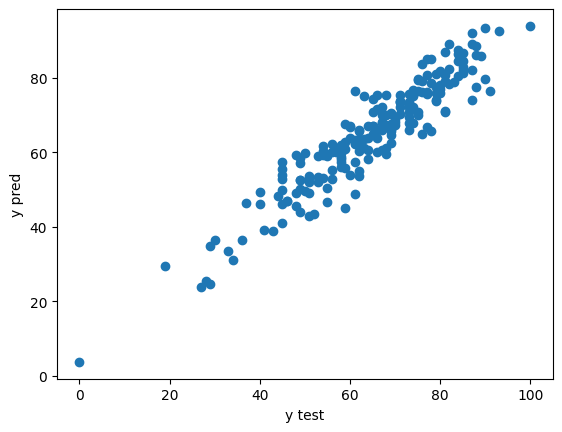

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('y test')
plt.ylabel('y pred')
plt.show()